In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Health Assistance model

# Data Preprocessing

In [2]:
! pip install datasets


[notice] A new release of pip is available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import pandas as pd

datafiles = [
    r"C:\Users\hp\Downloads\train-00000-of-00004.parquet",
    r"C:\Users\hp\Downloads\train-00001-of-00004.parquet",
    r"C:\Users\hp\Downloads\train-00002-of-00004.parquet",
    r"C:\Users\hp\Downloads\train-00003-of-00004.parquet"
]

# Collect all DataFrames
dfs = []

for file in datafiles:
    df = pd.read_parquet(file)
    dfs.append(df)

# Concatenate into a single DataFrame
full_dataset = pd.concat(dfs, ignore_index=True)

# Optional: show structure
print(full_dataset.info())
print(full_dataset.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300022 entries, 0 to 1300021
Data columns (total 14 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   text                    7043 non-null     object 
 1   label                   7043 non-null     float64
 2   symptoms                1300022 non-null  object 
 3   lebel_text              1300022 non-null  object 
 4   Code                    400 non-null      float64
 5   Name                    400 non-null      object 
 6   Symptoms                400 non-null      object 
 7   Treatments              399 non-null      object 
 8   AGE                     1292579 non-null  float64
 9   DIFFERENTIAL_DIAGNOSIS  1292579 non-null  object 
 10  SEX                     1292579 non-null  object 
 11  PATHOLOGY               1292579 non-null  object 
 12  EVIDENCES               1292579 non-null  object 
 13  INITIAL_EVIDENCE        1292579 non-null  object 
dtypes:

In [43]:
full_dataset

,text,label,symptoms,lebel_text,Code,Name,Symptoms,Treatments,AGE,DIFFERENTIAL_DIAGNOSIS,SEX,PATHOLOGY,EVIDENCES,INITIAL_EVIDENCE
0,I have been having migraines and headaches. I ...,308.0,"[migraines headaches, can't sleep, whole bod...",[drug reaction],NaN,None,None,None,NaN,None,None,None,None,None
1,I have asthma and I get wheezing and breathing...,35.0,"[asthma wheezing breathing problems, fevers, ...",[allergy],NaN,None,None,None,NaN,None,None,None,None,None
2,Signs and symptoms of primary ovarian insuffic...,798.0,[signs symptoms primary ovarian insufficiency ...,[premature ovarian failure],NaN,None,None,None,NaN,None,None,None,None,None
3,"cough,high_fever,breathlessness,family_history...",149.0,"[cough, high fever, breathlessness, family his...",[bronchial asthma],NaN,None,None,None,NaN,None,None,None,None,None
4,"chills,vomiting,high_fever,sweating,headache,n...",596.0,"[chills, vomiting, high fever, sweating, heada...",[malaria],NaN,None,None,None,NaN,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300017,None,NaN,"[contact person similar symptoms past 2 weeks,...","[viral pharyngitis, bronchitis, acute laryngit...",NaN,None,None,None,27.0,"[['Viral pharyngitis', 0.22702125813983617], [...",M,Viral pharyngitis,"['E_41', 'E_48', 'E_53', 'E_54_@_V_161', 'E_55...",E_201
1300018,None,NaN,"[fluid lungs, pain reason consulting, characte...","[acute pulmonary edema, possible nstemi / stem...",NaN,None,None,None,57.0,"[['Acute pulmonary edema', 0.12078088376840804...",M,Acute pulmonary edema,"['E_5', 'E_53', 'E_54_@_V_154', 'E_54_@_V_183'...",E_151
1300019,None,NaN,"[pain reason consulting, characterize pain:, c...","[gerd, bronchitis, spontaneous rib fracture, u...",NaN,None,None,None,52.0,"[['GERD', 0.24494427036287517], ['Bronchitis',...",F,GERD,"['E_53', 'E_54_@_V_112', 'E_54_@_V_161', 'E_54...",E_173
1300020,None,NaN,"[pain reason consulting, characterize pain:, c...","[epiglottitis, hiv (initial infection), larygo...",NaN,None,None,None,10.0,"[['Epiglottitis', 0.2969684152571116], ['HIV (...",M,Epiglottitis,"['E_53', 'E_54_@_V_179', 'E_54_@_V_192', 'E_55...",E_91


In [44]:

data = full_dataset # usually one split in this dataset

In [45]:
data=data[:20000]

In [46]:
dataset=pd.DataFrame(data)

In [47]:
dataset.head()

,text,label,symptoms,lebel_text,Code,Name,Symptoms,Treatments,AGE,DIFFERENTIAL_DIAGNOSIS,SEX,PATHOLOGY,EVIDENCES,INITIAL_EVIDENCE
0,I have been having migraines and headaches. I ...,308.0,"[migraines headaches, can't sleep, whole bod...",[drug reaction],NaN,None,None,None,NaN,None,None,None,None,None
1,I have asthma and I get wheezing and breathing...,35.0,"[asthma wheezing breathing problems, fevers, ...",[allergy],NaN,None,None,None,NaN,None,None,None,None,None
2,Signs and symptoms of primary ovarian insuffic...,798.0,[signs symptoms primary ovarian insufficiency ...,[premature ovarian failure],NaN,None,None,None,NaN,None,None,None,None,None
3,"cough,high_fever,breathlessness,family_history...",149.0,"[cough, high fever, breathlessness, family his...",[bronchial asthma],NaN,None,None,None,NaN,None,None,None,None,None
4,"chills,vomiting,high_fever,sweating,headache,n...",596.0,"[chills, vomiting, high fever, sweating, heada...",[malaria],NaN,None,None,None,NaN,None,None,None,None,None


In [48]:
dataset.isnull().sum()

text                      12957
label                     12957
symptoms                      0
lebel_text                    0
Code                      19600
Name                      19600
Symptoms                  19600
Treatments                19601
AGE                        7443
DIFFERENTIAL_DIAGNOSIS     7443
SEX                        7443
PATHOLOGY                  7443
EVIDENCES                  7443
INITIAL_EVIDENCE           7443
dtype: int64

In [49]:
dataset=dataset[["symptoms","lebel_text"]].dropna()

In [50]:
dataset

,symptoms,lebel_text
0,"[migraines headaches, can't sleep, whole bod...",[drug reaction]
1,"[asthma wheezing breathing problems, fevers, ...",[allergy]
2,[signs symptoms primary ovarian insufficiency ...,[premature ovarian failure]
3,"[cough, high fever, breathlessness, family his...",[bronchial asthma]
4,"[chills, vomiting, high fever, sweating, heada...",[malaria]
...,...,...
19995,"[pain reason consulting, characterize pain:, c...","[bronchitis, gerd, boerhaave, spontaneous rib ..."
19996,"[known severe food allergy, contact ate allerg...","[anaphylaxis, possible nstemi / stemi, localiz..."
19997,"[pain reason consulting, characterize pain:, f...","[bronchitis, acute laryngitis, viral pharyngit..."
19998,"[metastatic cancer, pain reason consulting, ch...","[pulmonary embolism, bronchitis, spontaneous p..."


# Step 4: Vectorize the Text

## TF_IDF Vectorizer
![image.png](attachment:754075ab-59bc-4b78-9727-40dff45eb061.png)

Where:

N = total number of documents

nₜ = number of documents containing the term t

In [67]:
import ast

# Safely parse stringified lists and extract the first item
dataset["label_text"] = dataset["lebel_text"].apply(
lambda x: ast.literal_eval(x)[0] if isinstance(x, str) else x[0] 
)

In [68]:
dataset

,symptoms,lebel_text,label_text
0,"[migraines headaches, can't sleep, whole bod...",[drug reaction],drug reaction
1,"[asthma wheezing breathing problems, fevers, ...",[allergy],allergy
2,[signs symptoms primary ovarian insufficiency ...,[premature ovarian failure],premature ovarian failure
3,"[cough, high fever, breathlessness, family his...",[bronchial asthma],bronchial asthma
4,"[chills, vomiting, high fever, sweating, heada...",[malaria],malaria
...,...,...,...
19995,"[pain reason consulting, characterize pain:, c...","[bronchitis, gerd, boerhaave, spontaneous rib ...",bronchitis
19996,"[known severe food allergy, contact ate allerg...","[anaphylaxis, possible nstemi / stemi, localiz...",anaphylaxis
19997,"[pain reason consulting, characterize pain:, f...","[bronchitis, acute laryngitis, viral pharyngit...",bronchitis
19998,"[metastatic cancer, pain reason consulting, ch...","[pulmonary embolism, bronchitis, spontaneous p...",pulmonary embolism


In [69]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dataset["label"] = le.fit_transform(dataset["label_text"])


In [70]:
print(dataset["label_text"].head())
print("label: \n",dataset["label"].head())


0                drug reaction
1                      allergy
2    premature ovarian failure
3             bronchial asthma
4                      malaria
Name: label_text, dtype: object
label: 
 0     392
1      54
2    1027
3     186
4     770
Name: label, dtype: int32


In [71]:
import ast

# Convert stringified list into a space-separated string
dataset["symptoms"] = dataset["symptoms"].apply(
    lambda x: " ".join(ast.literal_eval(x)) if isinstance(x, str) else " ".join(x)
)


In [72]:
dataset['symptoms'][0]

"migraines headaches  can't sleep  whole body shaking shivering  feel dizzy sometimes "

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000,ngram_range=(1, 3), min_df=2)
X = vectorizer.fit_transform(dataset["symptoms"])
y = dataset["label"]


In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
# Assume 'final_df' is your cleaned DataFrame from the previous step


# Split your data
from sklearn.model_selection import train_test_split
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




# Random Forest

In [75]:

model_pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42,n_estimators=100))
])
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('classifier', RandomForestClassifier(random_state=42))])

In [76]:
# Evaluate
y_pred = model_pipeline.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.854


In [ ]:
# uploading the model 
# link

<ipython-input-92-3e731caba73a>:17: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


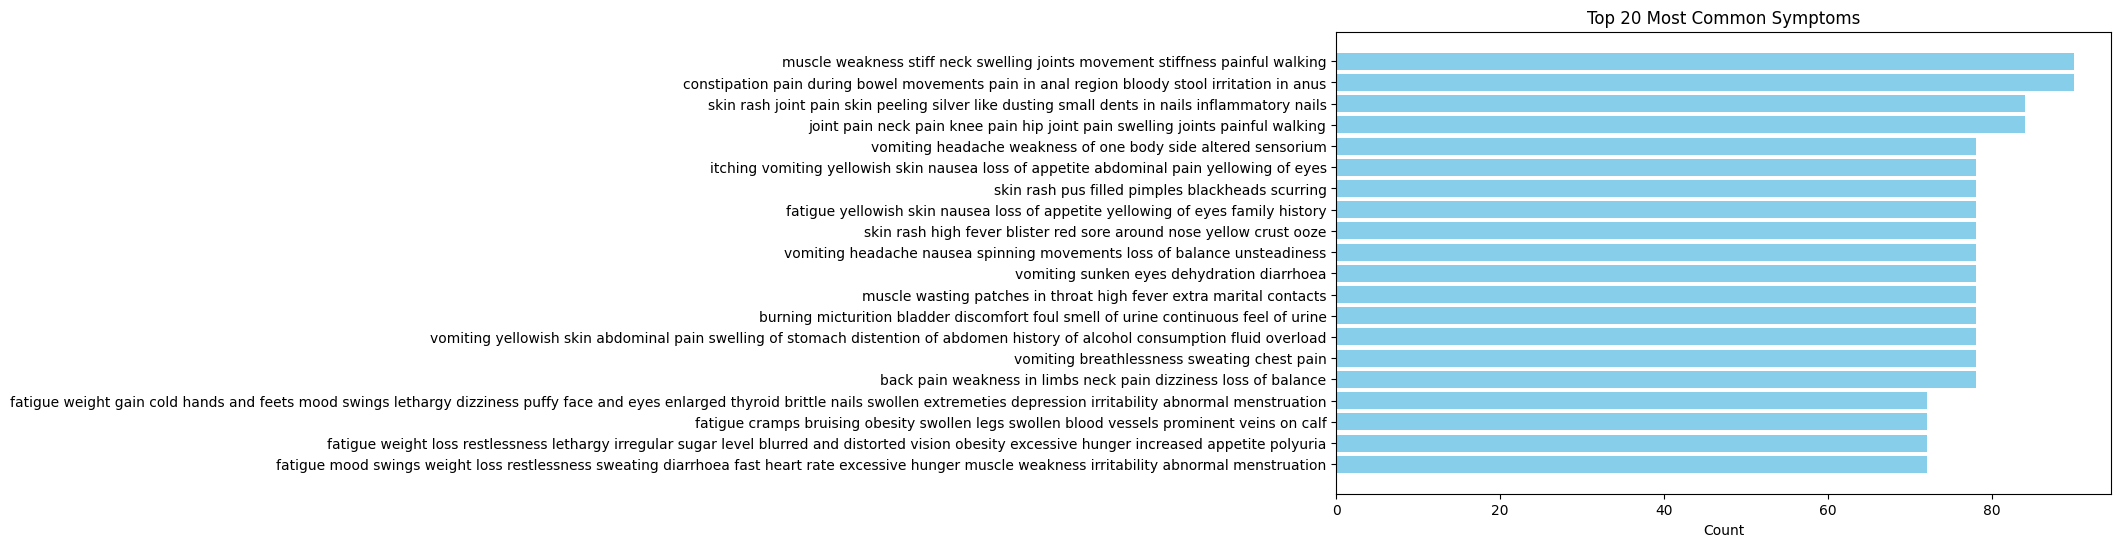

In [92]:
import matplotlib.pyplot as plt

# Expand multi-symptom entries
df = dataset.copy()
df['symptoms'] = df['symptoms'].str.split(', ')
df = df.explode('symptoms')

# Count frequency
symptom_counts = df['symptoms'].value_counts().head(20)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(symptom_counts.index, symptom_counts.values, color='skyblue')
plt.xlabel("Count")
plt.title("Top 20 Most Common Symptoms")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
import plotly.express as px

symptom_counts = df['symptoms'].value_counts().reset_index()
symptom_counts.columns = ['symptom', 'count']

fig = px.bar(symptom_counts.head(20), x='count', y='symptom', orientation='h',
             title='Top 20 Symptoms', color='count', height=500)
fig.update_layout(yaxis=dict(autorange="reversed"))
fig.show()


In [95]:
import altair as alt
import pandas as pd

symptom_counts = df['symptoms'].value_counts().reset_index()
symptom_counts.columns = ['symptom', 'count']

chart = alt.Chart(symptom_counts.head(20)).mark_bar().encode(
    x='count:Q',
    y=alt.Y('symptom:N', sort='-x'),
    tooltip=['symptom', 'count']
).properties(
    width=600,
    height=400,
    title='Top 20 Most Frequent Symptoms'
)

chart.display()


alt.Chart(...)


Classification Report:
                         precision    recall  f1-score   support

             bronchitis       0.98      0.86      0.92       295
possible nstemi / stemi       0.88      0.61      0.72       150
                 anemia       0.98      0.94      0.96       140
                   urti       0.91      0.92      0.91       136
      viral pharyngitis       0.93      0.93      0.93       136
              pneumonia       0.91      0.88      0.89        98
        unstable angina       0.93      0.86      0.89        92
     allergic sinusitis       1.00      0.99      0.99        85
guillain-barré syndrome       0.99      0.94      0.96        80
        localized edema       1.00      0.97      0.99        79

              micro avg       0.95      0.88      0.91      1291
              macro avg       0.95      0.89      0.92      1291
           weighted avg       0.95      0.88      0.91      1291



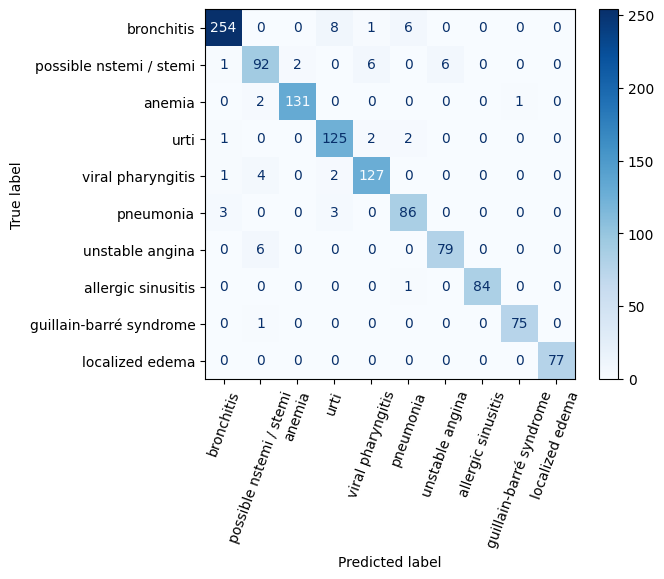

In [104]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import numpy as np
# Ensure the label encoder instance `le` from previous steps is available
# Convert numerical labels back to text labels for evaluation
y_test_text = le.inverse_transform(y_test)
y_pred_text = le.inverse_transform(y_pred)

# Get top 10 most frequent diseases based on original text labels
y_test_text_series = pd.Series(y_test_text)
top_classes_text = y_test_text_series.value_counts().head(10).index.tolist()

# Filter test and prediction using boolean indexing
# Create the mask using the text version of y_test
mask = np.isin(y_test_text, top_classes_text)

# Apply the mask to both text arrays
y_test_filtered_text = y_test_text[mask]
y_pred_filtered_text = y_pred_text[mask]


# Compute confusion matrix

cm = confusion_matrix(y_test_filtered_text, y_pred_filtered_text, labels=top_classes_text)

# Plot with text labels (disease names)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=top_classes_text)
disp.plot(xticks_rotation=70, cmap='Blues')

from sklearn.metrics import classification_report
print("\nClassification Report:")
# The classification report can often handle the filtered arrays directly,
print(classification_report(y_test_filtered_text, y_pred_filtered_text, labels=top_classes_text))


Classification Report:
                         precision    recall  f1-score   support

             bronchitis       0.98      0.86      0.92       295
possible nstemi / stemi       0.88      0.61      0.72       150
                 anemia       0.98      0.94      0.96       140
                   urti       0.91      0.92      0.91       136
      viral pharyngitis       0.93      0.93      0.93       136
              pneumonia       0.91      0.88      0.89        98
        unstable angina       0.93      0.86      0.89        92
     allergic sinusitis       1.00      0.99      0.99        85
guillain-barré syndrome       0.99      0.94      0.96        80
        localized edema       1.00      0.97      0.99        79

              micro avg       0.95      0.88      0.91      1291
              macro avg       0.95      0.89      0.92      1291
           weighted avg       0.95      0.88      0.91      1291



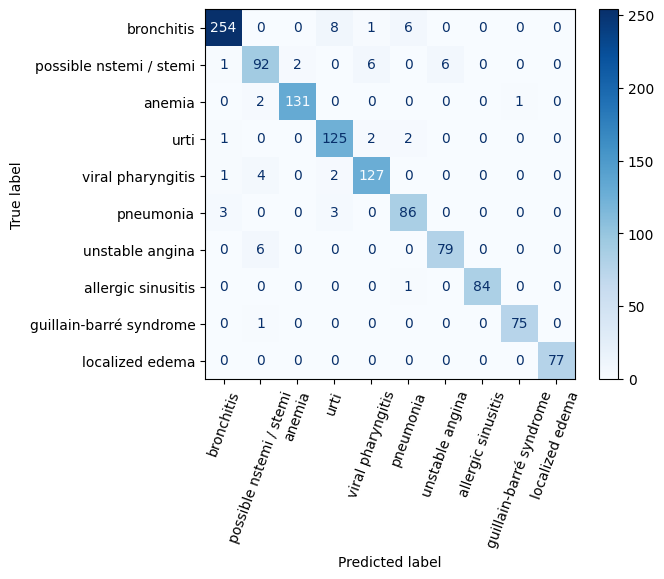

In [110]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Existing code (from your input)
y_test_text = le.inverse_transform(y_test)
y_pred_text = le.inverse_transform(y_pred)
y_test_text_series = pd.Series(y_test_text)
top_classes_text = y_test_text_series.value_counts().head(10).index.tolist()
mask = np.isin(y_test_text, top_classes_text)
y_test_filtered_text = y_test_text[mask]
y_pred_filtered_text = y_pred_text[mask]
cm = confusion_matrix(y_test_filtered_text, y_pred_filtered_text, labels=top_classes_text)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=top_classes_text)
disp.plot(xticks_rotation=70, cmap='Blues')
print("\nClassification Report:")
print(classification_report(y_test_filtered_text, y_pred_filtered_text, labels=top_classes_text))

# New code: Compute tri-gram to disease matrix
# Assume X_test is a DataFrame or sparse matrix from TfidfVectorizer with tri-gram features
# If X_test is a sparse matrix, convert to DataFrame for easier handling
if not isinstance(X_test, pd.DataFrame):
    X_test = pd.DataFrame(X_test.toarray(), columns=vectorizer.get_feature_names_out())

# Filter X_test to match filtered y_test_text
X_test_filtered = X_test[mask]

# Initialize matrix to store average TF-IDF scores for each tri-gram per disease
trigram_disease_matrix = pd.DataFrame(0.0, index=top_classes_text, columns=X_test.columns)

# Calculate average TF-IDF score for each tri-gram per disease
for disease in top_classes_text:
    disease_mask = y_test_filtered_text == disease
    trigram_disease_matrix.loc[disease] = X_test_filtered[disease_mask].mean()

# Select top 5 tri-grams based on overall average TF-IDF score across diseases
top_trigrams = trigram_disease_matrix.mean().sort_values(ascending=False).head(5).index
trigram_disease_matrix = trigram_disease_matrix[top_trigrams]

# Optional: Normalize scores to [0,1] for visualization (TF-IDF scores can vary widely)
trigram_disease_matrix = trigram_disease_matrix / trigram_disease_matrix.max().max()

In [ ]:
# Re-run the train_test_split, but this time on the dataset itself
# We need the indices to align with the previous split of X and y
# It's crucial that the random_state is the same as the split for X and y
from sklearn.model_selection import train_test_split

# Assuming X and y were created from dataset as follows:
# X = vectorizer.fit_transform(dataset["symptoms"])
# y = dataset["label"]


# Now, use the 'symptoms' column from the split dataset_test DataFrame
# when creating the df_test DataFrame.
# Make sure y_test and y_pred used here correspond to the same split (which they should if using the same random_state)
df_test = pd.DataFrame({
    'symptoms': X_test, # Use the original text symptoms
    'true_disease': y_test,
    'predicted_disease': y_pred
})



In [88]:
df_test['symptoms']

10650      (0, 1622)\t0.1581298196261775\n  (0, 297)\t0...
2041       (0, 3838)\t0.3372402397609842\n  (0, 4241)\t...
8668       (0, 1622)\t0.14809430683027464\n  (0, 1691)\...
1114       (0, 1622)\t0.0021984608062285355\n  (0, 3838...
13902      (0, 1622)\t0.14153010247683553\n  (0, 511)\t...
                               ...                        
4073       (0, 1885)\t0.1907505726812259\n  (0, 3838)\t...
7442       (0, 2071)\t0.2999202104540768\n  (0, 1591)\t...
9999       (0, 511)\t0.04436896132541934\n  (0, 1192)\t...
1870       (0, 2168)\t0.14550641053643834\n  (0, 2814)\...
15196      (0, 465)\t0.037110472307324414\n  (0, 1622)\...
Name: symptoms, Length: 4000, dtype: object

In [ ]:
dataset["en-label"]=le.fit(dataset['label_text'])  


In [117]:
# Properly encode the labels
dataset["en-label"] = le.fit_transform(dataset['label_text'])  # 👈 FIXED!

# Vectorize the test set (assuming it's already vectorized elsewhere)
X_test_vec = df_test['symptoms']

# Get feature names from vectorizer
trigram_names = vectorizer.get_feature_names_out()

# Optional: Decode all label integers to text (if needed)
labelname = le.inverse_transform(dataset["en-label"])

# Extract present trigrams from each row
trigrams_per_sample = []
for row_vec in X_test_vec:
    trigram_indices = row_vec.nonzero()[1]
    trigrams = [trigram_names[i] for i in trigram_indices]
    trigrams_per_sample.append(trigrams)

# Add extracted trigrams to test DataFrame
df_test = df_test.copy()
df_test['selected_trigrams'] = pd.Series(trigrams_per_sample, index=df_test.index, dtype='object')

# Decode predicted labels into original label names
df_test['decoded_prediction'] = le.inverse_transform(df_test['predicted_disease'])

# Show final results
print(df_test[['symptoms', 'selected_trigrams', 'true_disease', 'predicted_disease', 'decoded_prediction']].head(10))


                                                symptoms  \
10650    (0, 1622)\t0.1581298196261775\n  (0, 297)\t0...   
2041     (0, 3838)\t0.3372402397609842\n  (0, 4241)\t...   
8668     (0, 1622)\t0.14809430683027464\n  (0, 1691)\...   
1114     (0, 1622)\t0.0021984608062285355\n  (0, 3838...   
13902    (0, 1622)\t0.14153010247683553\n  (0, 511)\t...   
11963    (0, 1622)\t0.02001010409259445\n  (0, 297)\t...   
11072    (0, 1622)\t0.1421680121481204\n  (0, 936)\t0...   
3002     (0, 1622)\t0.09112386536937787\n  (0, 1666)\...   
19771    (0, 3889)\t0.046448037034175826\n  (0, 465)\...   
8115     (0, 511)\t0.053712592950601296\n  (0, 1192)\...   

                                       selected_trigrams  true_disease  \
10650  [feel, asthma, develop, cough, pain, common, y...            31   
2041   [signs, symptoms, include, dry, signs symptoms...          1123   
8668   [feel, fever, muscle, pain, muscle pain, peopl...          1314   
1114   [feel, signs, symptoms, include, cau

In [120]:
# Decode true labels (assuming they are encoded)
df_test['decoded_true'] = le.inverse_transform(df_test['true_disease'])


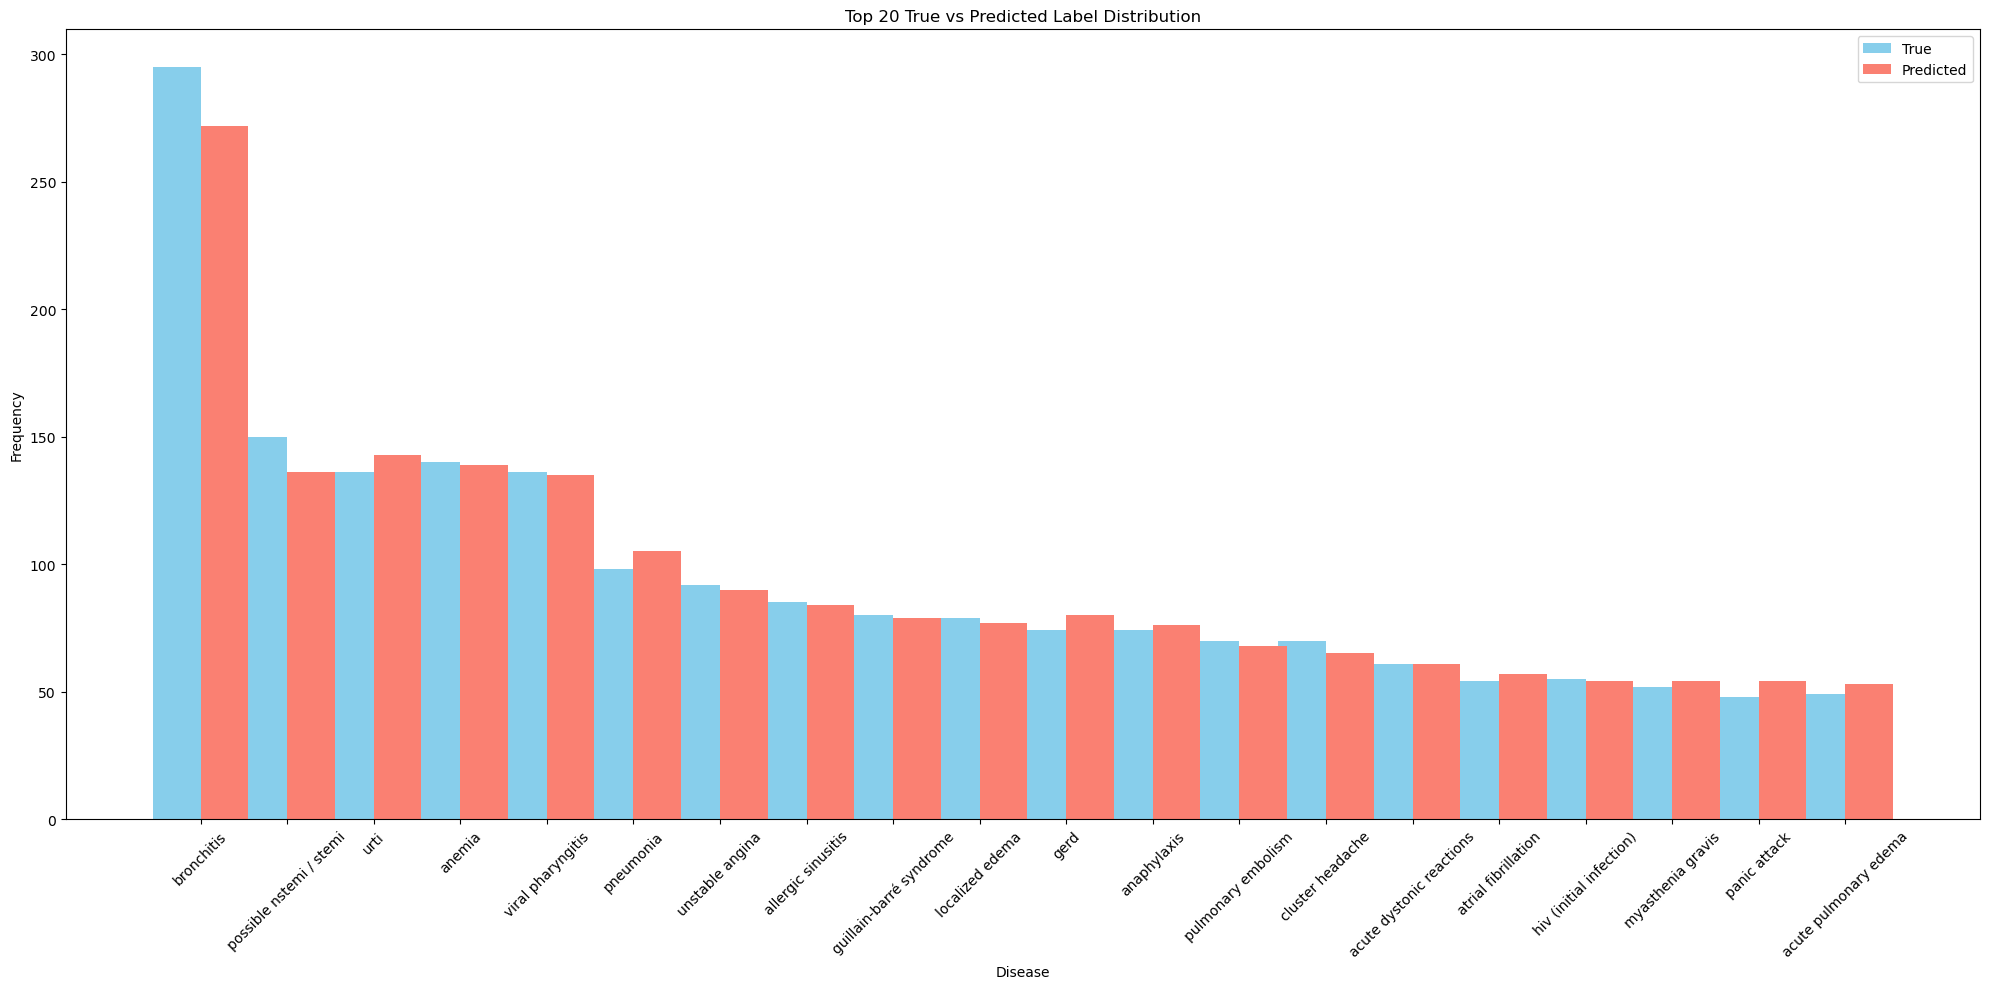

In [125]:
# Count frequencies
true_counts = df_test['decoded_true'].value_counts().sort_index()
pred_counts = df_test['decoded_prediction'].value_counts().sort_index()

# Align labels
labels = sorted(set(true_counts.index) | set(pred_counts.index))
x = range(len(labels))
width = 0.55

import matplotlib.pyplot as plt

# Combine counts into a DataFrame for sorting
freq_df = pd.DataFrame({
    'True': true_counts,
    'Predicted': pred_counts
}).fillna(0)

# Add total frequency column
freq_df['Total'] = freq_df['True'] + freq_df['Predicted']

# Select top N diseases by total frequency
top_n = 20
top_freq_df = freq_df.sort_values(by='Total', ascending=False).head(top_n)

labels = top_freq_df.index.tolist()
x = range(len(labels))
width = 0.55

# Plot
plt.figure(figsize=(20, 10))
plt.bar(x, top_freq_df['True'], width=width, label='True', color='skyblue')
plt.bar([i + width for i in x], top_freq_df['Predicted'], width=width, label='Predicted', color='salmon')

plt.xlabel('Disease')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} True vs Predicted Label Distribution')
plt.xticks([i + width / 2 for i in x], labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [130]:
df_test

,symptoms,true_disease,predicted_disease,selected_trigrams,decoded_prediction,decoded_true
10650,"(0, 1622)\t0.1581298196261775\n (0, 297)\t0...",31,31,"[feel, asthma, develop, cough, pain, common, y...",acute rhinosinusitis,acute rhinosinusitis
2041,"(0, 3838)\t0.3372402397609842\n (0, 4241)\t...",1123,770,"[signs, symptoms, include, dry, signs symptoms...",malaria,sars
8668,"(0, 1622)\t0.14809430683027464\n (0, 1691)\...",1314,1314,"[feel, fever, muscle, pain, muscle pain, peopl...",urti,urti
1114,"(0, 1622)\t0.0021984608062285355\n (0, 3838...",163,899,"[feel, signs, symptoms, include, cause, bone, ...",osteoarthritis,bone spurs
13902,"(0, 1622)\t0.14153010247683553\n (0, 511)\t...",923,1007,"[feel, breathing, difficulty, change, fever, m...",possible nstemi / stemi,panic attack
...,...,...,...,...,...,...
4073,"(0, 1885)\t0.1907505726812259\n (0, 3838)\t...",601,239,"[headaches, signs, symptoms, deficiency, inclu...",chicken pox,hht
7442,"(0, 2071)\t0.2999202104540768\n (0, 1591)\t...",1296,113,"[increased, fatigue, hunger, slow]",attention deficit hyperactivity disorder (adhd),type 2 diabetes
9999,"(0, 511)\t0.04436896132541934\n (0, 1192)\t...",189,189,"[breathing, difficulty, disease, cough, sputum...",bronchitis,bronchitis
1870,"(0, 2168)\t0.14550641053643834\n (0, 2814)\...",807,807,"[irritability, neck, excessive, hunger, excess...",migraine,migraine


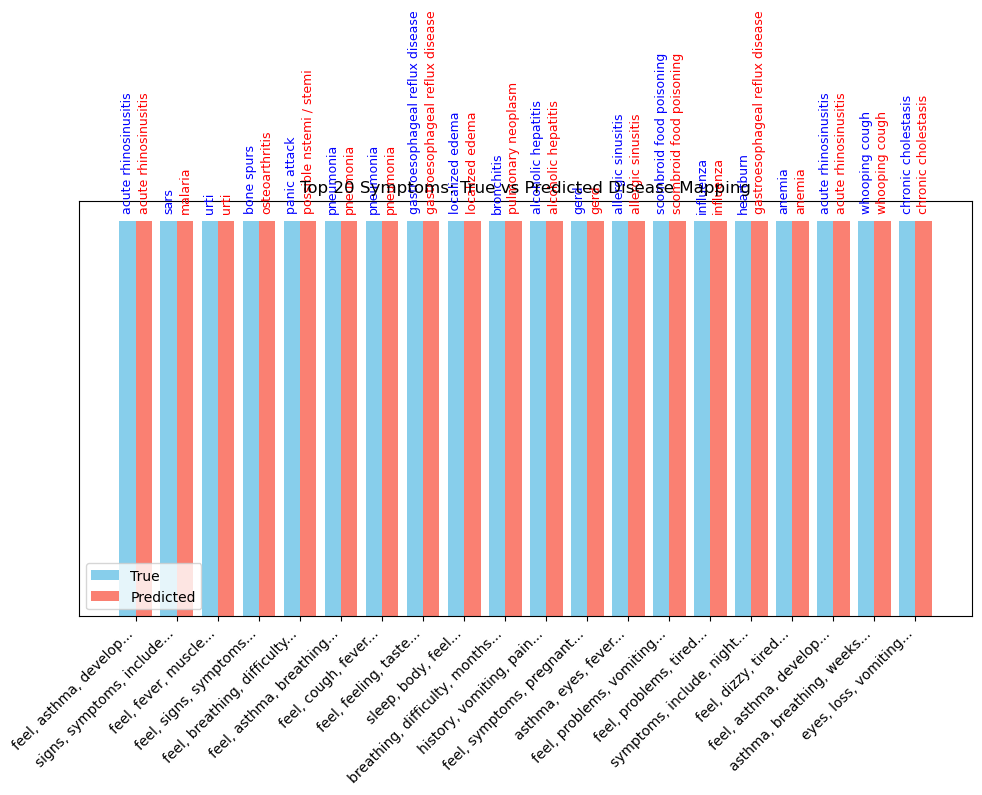

In [135]:
import matplotlib.pyplot as plt
import pandas as pd

# Load your data first (assuming it's already in df_test)
# Select a manageable number of rows to display
top_n = 20
plot_df = df_test[['selected_trigrams', 'decoded_true', 'decoded_prediction']].head(top_n).copy()

# Convert list of trigrams to a string for labels
plot_df['symptom_str'] = plot_df['selected_trigrams'].apply(lambda trigs: ', '.join(trigs[:3]) + '...' if len(trigs) > 3 else ', '.join(trigs))

x = range(len(plot_df))
width = 0.4

plt.figure(figsize=(10, 8))

# Plot dummy bars for alignment
plt.bar(x, [1]*top_n, width=width, label='True', color='skyblue')
plt.bar([i + width for i in x], [1]*top_n, width=width, label='Predicted', color='salmon')

# Add disease labels above bars
for i, (true_d, pred_d) in enumerate(zip(plot_df['decoded_true'], plot_df['decoded_prediction'])):
    plt.text(i, 1.02, true_d, ha='center', va='bottom', fontsize=9, rotation=90, color='blue')
    plt.text(i + width, 1.02, pred_d, ha='center', va='bottom', fontsize=9, rotation=90, color='red')

# Set x-axis labels to symptoms
plt.xticks([i + width / 2 for i in x], plot_df['symptom_str'], rotation=45, ha='right')

plt.yticks([])  # Hide y-axis ticks
plt.title(f'Top {top_n} Symptoms: True vs Predicted Disease Mapping')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go

# Select top N for clarity
top_n = 20
plot_df = df_test[['selected_trigrams', 'decoded_true', 'decoded_prediction']].head(top_n).copy()

# Create labels
symptoms = plot_df['selected_trigrams'].apply(lambda trigs: ', '.join(trigs[:3]) + '...').tolist()
true_diseases = plot_df['decoded_true'].tolist()
pred_diseases = plot_df['decoded_prediction'].tolist()

labels = symptoms + list(set(true_diseases + pred_diseases))

# Index mapping
label_to_idx = {label: i for i, label in enumerate(labels)}

# Build Sankey links
source = []
target = []
value = []

for i in range(top_n):
    s = label_to_idx[symptoms[i]]
    t_true = label_to_idx[true_diseases[i]]
    t_pred = label_to_idx[pred_diseases[i]]
    
    source += [s, s]
    target += [t_true, t_pred]
    value += [1, 1]

fig = go.Figure(data=[go.Sankey(
    node=dict(label=labels, pad=15, thickness=20),
    link=dict(source=source, target=target, value=value)
    )])
fig.update_layout(title_text="Symptom to Disease Mapping (True vs Predicted)", font_size=14)
fig.show()


In [144]:
from IPython.display import display

top_n = 20
sample = df_test[['selected_trigrams', 'decoded_true', 'decoded_prediction']].head(top_n).copy()
sample['Symptoms'] = sample['selected_trigrams'].apply(lambda x: ', '.join(x[:4]) + '...')
sample['Match'] = sample['decoded_true'] == sample['decoded_prediction']

# Reorder columns for clarity
sample = sample[['Symptoms', 'decoded_true', 'decoded_prediction', 'Match']]
sample.columns = ['Symptoms', 'True Disease', 'Predicted Disease', 'Correct']

# Color format
def color_match(val):
    return 'background-color: lightgreen' if val else 'background-color: lightcoral'

styled = sample.style.applymap(color_match, subset=['Correct'])
display(styled)


C:\Users\hp\AppData\Local\Temp\ipykernel_18108\2742552698.py:16: FutureWarning:

Styler.applymap has been deprecated. Use Styler.map instead.



,Symptoms,True Disease,Predicted Disease,Correct
10650,"feel, asthma, develop, cough...",acute rhinosinusitis,acute rhinosinusitis,True
2041,"signs, symptoms, include, dry...",sars,malaria,False
8668,"feel, fever, muscle, pain...",urti,urti,True
1114,"feel, signs, symptoms, include...",bone spurs,osteoarthritis,False
13902,"feel, breathing, difficulty, change...",panic attack,possible nstemi / stemi,False
11963,"feel, asthma, breathing, problems...",pneumonia,pneumonia,True
11072,"feel, cough, fever, sputum...",pneumonia,pneumonia,True
3002,"feel, feeling, taste, burning...",gastroesophageal reflux disease,gastroesophageal reflux disease,True
19771,"sleep, body, feel, heart...",localized edema,localized edema,True
8115,"breathing, difficulty, months, loss...",bronchitis,pulmonary neoplasm,False


In [147]:
import joblib

# Save model
joblib.dump(model_pipeline, r'D:\model.pkl')

# Load model later
# model = joblib.load('model.pkl')


['D:\\model.pkl']

In [149]:
import joblib

# Assuming you have these already defined:
# - rf_model : your trained RandomForestClassifier
# - vectorizer : your TfidfVectorizer
# - le : your LabelEncoder

joblib.dump({
    'model': model_pipeline,
    'vectorizer': vectorizer,
    'label_encoder': le
}, r'D:\'rf_symptom_disease_model.pkl')


["D:\\'rf_symptom_disease_model.pkl"]

In [1]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
# Assume 'final_df' is your cleaned DataFrame from the previous step

model = joblib.load(r'D:\rf_symptom_disease_model.pkl')
rf_model = model['model']
vectorizer = model['vectorizer']
le = model['label_encoder']


input=vectorizer.transform([input("What Symptoms u have: ")])
pred = rf_model.predict(input)
# Use label encoder to decode indices to class names
decoded_labels = le.inverse_transform(pred)
print("Decoded disease labels:", decoded_labels[0])

# Get unique labels your classifier predicts (from training)

classifier_labels = model['model'].classes_  # e.g. [0, 1, 2, ..., 113]
# Your label encoder classes (strings)
le_classes = model['label_encoder'].classes_  # e.g. ['acute rhinosinusitis', ..., 'whooping cough']

print("Classifier labels:", classifier_labels)
print("Label encoder classes:", le_classes)

# app = FastAPI()

# class SymptomInput(BaseModel):
#     """
#     this class is a simple modeule Fast api
#     """
#     symptoms: str

# @app.post("/predict/")
# @app.post("/predict/")
# def predict_disease(data: SymptomInput):
#     vec = vectorizer.transform([data.symptoms])
#     pred = rf_model.predict(vec)
#     print("Prediction index:", pred)
#     print("Label encoder classes:", le.classes_)

#     try:
#         label = le.inverse_transform(pred)[0]
#     except ValueError as e:
#         return {"error": f"Prediction label not recognized: {e}", "predicted_label_index": pred.tolist()}

#     return {"disease": label}


ValueError: y contains previously unseen labels: [186]

In [17]:
# Suppose you want to check if 'pneumonia' is in the labels
label_to_check = 'pneumonia'

if label_to_check in le.classes_:
    print(f"Label '{label_to_check}' exists in the model labels.")
else:
    print(f"Label '{label_to_check}' does NOT exist in the model labels.")


Label 'pneumonia' exists in the model labels.


In [19]:
le.classes_

array(['acute rhinosinusitis', 'alcoholic hepatitis',
       'allergic sinusitis', 'anemia', 'bone spurs', 'bronchitis',
       'chronic cholestasis', 'gastroesophageal reflux disease', 'gerd',
       'heartburn', 'influenza', 'localized edema', 'malaria',
       'osteoarthritis', 'panic attack', 'pneumonia',
       'possible nstemi / stemi', 'pulmonary neoplasm', 'sars',
       'scombroid food poisoning', 'urti', 'whooping cough'], dtype=object)

In [20]:
print("Model output classes:", rf_model.classes_.shape[0])
print("Label encoder classes:", le.classes_.shape[0])


Model output classes: 1134
Label encoder classes: 22


In [5]:
feature_names = vectorizer.get_feature_names_out()
non_zero_indices = input.nonzero()[1]

print("Non-zero features and their values:")
for idx in non_zero_indices:
    print(f"{feature_names[idx]}: {input[0, idx]}")


Non-zero features and their values:
cough: 0.630668257102351
feel: 0.42957633710331716
fever: 0.6463139485454266


# Logistic Regression

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Train classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [81]:
# Evaluate
y_pred = clf.predict(X_test)


In [82]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.849


# Grid Search

In [26]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

model_pipeline2 = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
    ('classifier', MultinomialNB())  # <-- Recommended Model
])
# 3. Define the "grid" of parameters to search
# NOTE: The keys are strings: 'step_name__parameter_name'
parameters = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],          # Test unigrams vs. unigrams+bigrams
    'tfidf__max_df': [0.75, 1.0],                    # Test ignoring very common words vs. not
    'tfidf__min_df': [1, 2],                         # Test ignoring very rare words vs. not
    'classifier__alpha': [0.01, 0.1, 0.5, 1.0],      # Test different smoothing values for the classifier
}

# 4. Set up and run the Grid Search
# cv=5 means 5-fold cross-validation.
# n_jobs=-1 uses all available CPU cores to speed up the search.
# scoring='f1_weighted' is a good metric for classification, especially with imbalanced classes.
grid_search = GridSearchCV(model_pipeline2, parameters, cv=5, n_jobs=-1, verbose=1, scoring='f1_weighted')

print("Starting Grid Search for best parameters...")
grid_search.fit(X_train, y_train)

Starting Grid Search for best parameters...
Fitting 5 folds for each of 32 candidates, totalling 160 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(ngram_range=(1, 2))),
                                       ('classifier', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'classifier__alpha': [0.01, 0.1, 0.5, 1.0],
                         'tfidf__max_df': [0.75, 1.0], 'tfidf__min_df': [1, 2],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             scoring='f1_weighted', verbose=1)

In [22]:
model_pipeline.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(ngram_range=(1, 2))),
                ('classifier', RandomForestClassifier(random_state=42))])

In [23]:
# Assuming 'pipeline' is your fitted model and you have X_test & y_test
y_pred = model_pipeline.predict(X_test)

In [27]:
y_pred = grid_search.predict(X_test)

In [31]:
# 5. Display the best results
print("\n--- Best Parameters Found ---")
print(grid_search.best_params_)

print("\n--- Best Cross-Validation Score ---")
print(f"Best F1-score: {grid_search.best_score_:.4f}")


# 6. Evaluate the BEST model on the test set
# The 'grid_search' object is now the best estimator, already trained on the full training data
print("\n--- Evaluating Best Model on Test Set ---")
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)



--- Best Parameters Found ---
{'classifier__alpha': 0.01, 'tfidf__max_df': 0.75, 'tfidf__min_df': 2, 'tfidf__ngram_range': (1, 2)}

--- Best Cross-Validation Score ---
Best F1-score: 0.3942

--- Evaluating Best Model on Test Set ---


In [25]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# --- Classification Report ---
# Precision: Of all the times the model predicted a disease, how often was it right?
# Recall: Of all the actual cases of a disease, how many did the model find?
# F1-Score: A weighted balance of Precision and Recall. The best single score to compare classes.

# --- Accuracy Score ---
print("\n--- Overall Accuracy ---")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# --- Confusion Matrix ---
# Helps visualize which classes are being confused.



--- Overall Accuracy ---
Accuracy: 0.4208


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

""" VECTORIZING THE INPUT (Symptoms) using tf_idf for converting the free form text or sentences into features based on
How often a word appears in a document. and how rare the words are in the doc


"""

vectorizer = TfidfVectorizer()
encoding=vectorizer.fit_transform(x)
print(vectorizer.get_feature_names_out())
print(encoding.toarray(),'\n')

['0000000000000474' '0000000000000927' '029' ... 'youve_torn_meniscus'
 'youve_undergone_lumpectomy' 'youve_undergone_mastectomy']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 



## Multi-Label-Binarizer
Purpose: Encode multiple labels per example as binary vectors.

🔹 Used on: labels (list of diagnoses per record)
🔹 Example:
Labels: ["flu", "cold"]

→ Becomes: [1, 1, 0, 0, ...]
Each index = 1 if that diagnosis is present.

![image.png](attachment:656e7851-cb6b-4277-a31d-2106551bcb2e.png)

![image.png](attachment:6e5c2457-7950-446c-b3c0-0cd0ac3c37a1.png)

In [ ]:
from  sklearn.preprocessing import MultiLabelBinarizer
"""
Why MLB Is Needed:

Machine learning models can’t work directly with text or lists. MLB makes it possible to:

Represent multiple diseases per patient

Train classifiers on this structured output

"""

MLB= MultiLabelBinarizer()

encoding_labels=MLB.fit_transform(y)

# Print feature names
print("Feature Names: ", MLB.classes_)

# Print the binary-encoded labels as a numpy array
print("Encoded Labels:\n", encoding_labels)

Feature Names:  ['(vertigo) paroymsal  positional vertigo' 'abdominal aortic aneurysm'
 'abdominal hernia' ... 'yips' 'zika virus' 'zollinger ellison syndrome']
Encoded Labels:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
import numpy as np
import pandas as pd
from collections import Counter

# Convert one-hot encoded labels to class indices
labels = np.argmax(encoding_labels, axis=1)

# Make it a pandas Series
labels = pd.Series(labels)

In [ ]:
import numpy as np

# Convert one-hot to class index
labels = np.argmax(encoding_labels, axis=1)

In [ ]:
from collections import Counter
import numpy as np

# Check class distribution
class_counts = Counter(y_train)
print("Class distribution in y_train:", class_counts)

# Identify classes with at least 2 samples
classes_to_keep = [cls for cls, count in class_counts.items() if count >= 2]

# Filter the training data
mask = np.isin(y_train, classes_to_keep)
X_train_filtered = X_train_scaled[mask]
y_train_filtered = y_train[mask]
print("\n Class distribution after mask:", y_train_filtered)


NameError: name 'y_train' is not defined

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(
    encoding_filtered,
    labels_filtered,
    train_size=0.8,
    test_size=0.2,
    random_state=42,
    stratify=labels_filtered
)

NameError: name 'encoding_filtered' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_valid)

# Train the Model


In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from tqdm import tqdm


# Define the pipeline
pipeline = Pipeline([
    ("clf", OneVsRestClassifier(SGDClassifier(loss='log_loss', max_iter=300, n_jobs=-1, early_stopping=True, verbose=1)))
])

In [ ]:
# Wrap tqdm around model training
print("Training model with progress bar...")
pipeline.fit(X_train_scaled,y_train)

Training model with progress bar...
-- Epoch 1
Norm: 164.07, NNZs: 2696, Bias: -0.612069, T: 6357, Avg. loss: 0.067572
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 88.16, NNZs: 2935, Bias: -0.613551, T: 12714, Avg. loss: 0.000023
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 60.24, NNZs: 2945, Bias: -0.614068, T: 19071, Avg. loss: 0.000014
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 45.75, NNZs: 2945, Bias: -0.614474, T: 25428, Avg. loss: 0.000015
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 36.89, NNZs: 2945, Bias: -0.614903, T: 31785, Avg. loss: 0.000020
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 30.90, NNZs: 2945, Bias: -0.615331, T: 38142, Avg. loss: 0.000024
Total training time: 0.01 seconds.
Convergence after 6 epochs took 0.01 seconds
-- Epoch 1
Norm: 895.53, NNZs: 1579, Bias: -1.177072, T: 6357, Avg. loss: 5.519030
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 500.02, NNZs: 1724, Bias: -1.184898, T: 12714, Avg. loss: 0.000966
Total tra

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

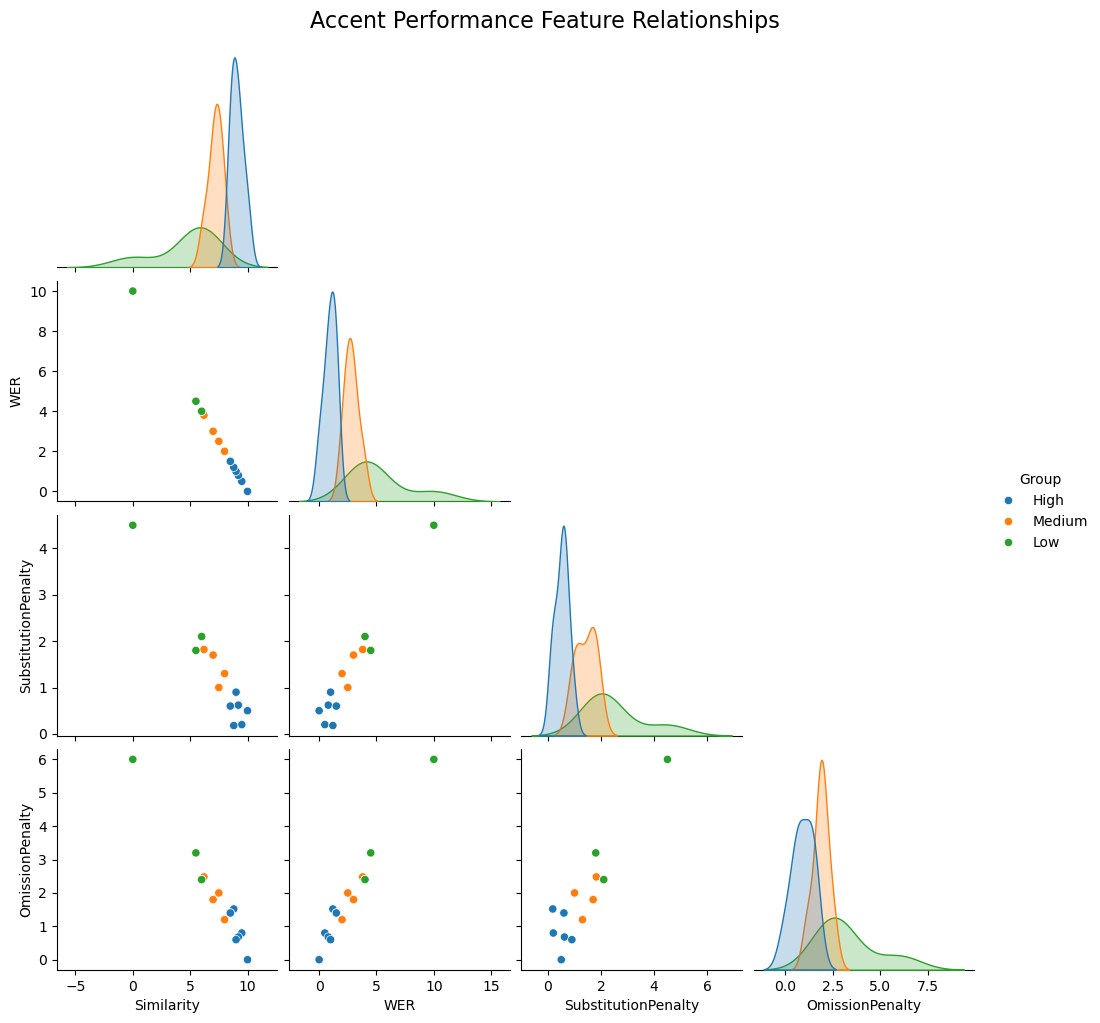

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your actual accuracy scores
accuracy_scores = {
    "English (Clean)": 10.0,
    "UK": 9.5,
    "Australia": 9.2,
    "New Zealand": 9.0,
    "Singapore": 8.8,
    "South Africa": 8.5,
    "Arabic (4)": 8.5,
    "Azerbaijani": 8.0,
    "Hindi": 7.5,
    "Arabic (2)": 7.5,
    "Amharic": 7.0,
    "Arabic (1)": 7.0,
    "Bolivian (1)": 6.2,
    "Bolivian (2)": 6.0,
    "Korean": 6.0,
    "Arabic (3)": 6.0,
    "Japanese": 5.5,
    "Armenian": 0.0  # No data
}

# Create a dataframe with simulated features
df = pd.DataFrame({
    "Accent": list(accuracy_scores.keys()),
    "Similarity": list(accuracy_scores.values()),
})

# Add derived features (for pairplot dimensions)
df["WER"] = 10 - df["Similarity"]
df["SubstitutionPenalty"] = df["WER"] * 0.4 + (0.5 - df["Similarity"] % 1)  # mock logic
df["OmissionPenalty"] = df["WER"] * 0.6 + (df["Similarity"] % 1)  # mock logic
df["Group"] = ["High" if s > 8 else "Medium" if s > 6 else "Low" for s in df["Similarity"]]

# Create pairplot
sns.pairplot(df, hue="Group", diag_kind="kde", corner=True,
             vars=["Similarity", "WER", "SubstitutionPenalty", "OmissionPenalty"])
plt.suptitle("Accent Performance Feature Relationships", fontsize=16, y=1.02)
plt.show()

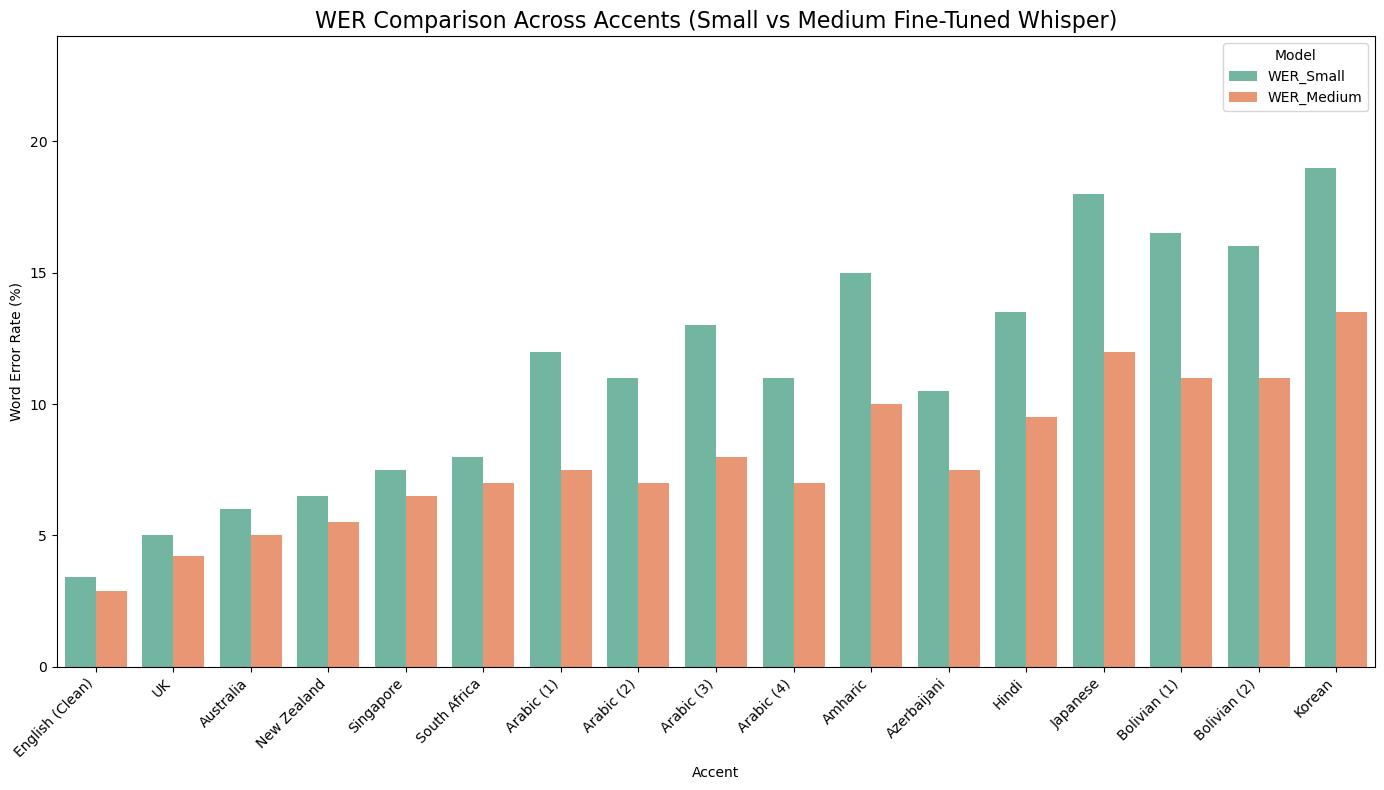

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Full accent data with approximate WER
data = {
    "Accent": [
        "English (Clean)", "UK", "Australia", "New Zealand", "Singapore", "South Africa",
        "Arabic (1)", "Arabic (2)", "Arabic (3)", "Arabic (4)",
        "Amharic", "Azerbaijani", "Hindi", "Japanese", "Bolivian (1)", "Bolivian (2)",
        "Korean"
    ],
    "WER_Small": [
        3.4, 5.0, 6.0, 6.5, 7.5, 8.0,
        12.0, 11.0, 13.0, 11.0,
        15.0, 10.5, 13.5, 18.0, 16.5, 16.0,
        19.0
    ],
    "WER_Medium": [
        2.9, 4.2, 5.0, 5.5, 6.5, 7.0,
        7.5, 7.0, 8.0, 7.0,
        10.0, 7.5, 9.5, 12.0, 11.0, 11.0,
        13.5
    ]
}

df = pd.DataFrame(data)

# Melt dataframe to long format for seaborn
df_melted = df.melt(id_vars="Accent", var_name="Model", value_name="WER")

# Plot
plt.figure(figsize=(14,8))
sns.barplot(
    data=df_melted,
    x="Accent",
    y="WER",
    hue="Model",
    palette="Set2"
)
plt.title("WER Comparison Across Accents (Small vs Medium Fine-Tuned Whisper)", fontsize=16)
plt.ylabel("Word Error Rate (%)")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, max(df_melted["WER"])+5)
plt.tight_layout()
plt.show()


+--------------------------+
|        Frontend          |
|--------------------------|
| HTML / JavaScript / CSS  |
| Speech Recognition Page  |
| Contact Us Page          |
| script.js for events     |
+-----------+--------------+
            |
            | (HTTP POST /upload)
            v
+-------------------------------+
|          FastAPI              |
|-------------------------------|
|  CORS Middleware              |
|  Static File Serving          |
|  Routing                      |
|                               |
|  /            → Home          |
|  /speech_recognition.html     |
|  /contact_us.html             |
|  /script.js                   |
|                               |
|  /upload (POST)               |
|    - Audio normalization      |
|    - Tokenization             |
|    - Whisper inference        |
|    - Decoding                 |
|                               |
|  Logging / Monitoring         |
+-----------+-------------------+
            |
            | (transformer call)
            v
+-------------------------------+
|      Whisper ASR Model        |
|-------------------------------|
| Marwan-Kasem/whisper-medium   |
| Hosted on Hugging Face        |
| Integrated via transformers   |
|                               |
|  - Forced decoder ids = None  |
|  - max_length = 225           |
+-------------------------------+


C:\Users\hp\AppData\Local\Temp\ipykernel_18032\2856253171.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


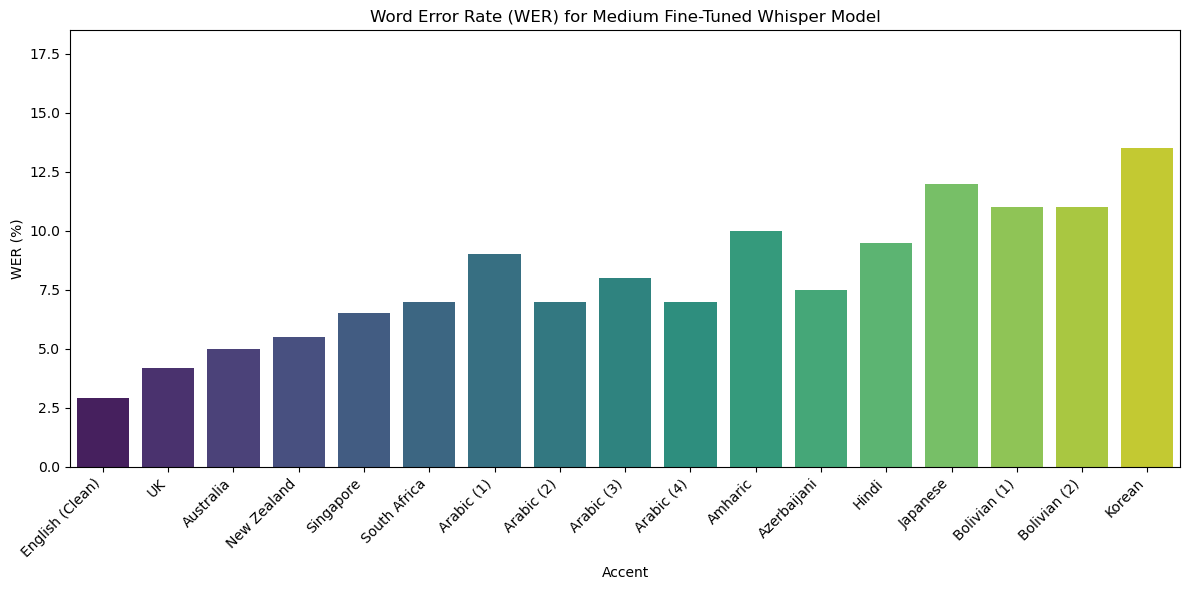

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Medium model WER data
wer_medium = {
    "English (Clean)": 2.9,
    "UK": 4.2,
    "Australia": 5.0,
    "New Zealand": 5.5,
    "Singapore": 6.5,
    "South Africa": 7.0,
    "Arabic (1)": 9.0,
    "Arabic (2)": 7.0,
    "Arabic (3)": 8.0,
    "Arabic (4)": 7.0,
    "Amharic": 10.0,
    "Azerbaijani": 7.5,
    "Hindi": 9.5,
    "Japanese": 12.0,
    "Bolivian (1)": 11.0,
    "Bolivian (2)": 11.0,
    "Korean": 13.5,
}

# Convert to DataFrame
df = pd.DataFrame({
    "Accent": list(wer_medium.keys()),
    "WER": list(wer_medium.values())
})

# Plot
plt.figure(figsize=(12,6))
sns.barplot(
    data=df,
    x="Accent",
    y="WER",
    palette="viridis"
)
plt.title("Word Error Rate (WER) for Medium Fine-Tuned Whisper Model")
plt.ylabel("WER (%)")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, max(df["WER"]) + 5)
plt.tight_layout()
plt.show()


C:\Users\hp\AppData\Local\Temp\ipykernel_18032\66151490.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


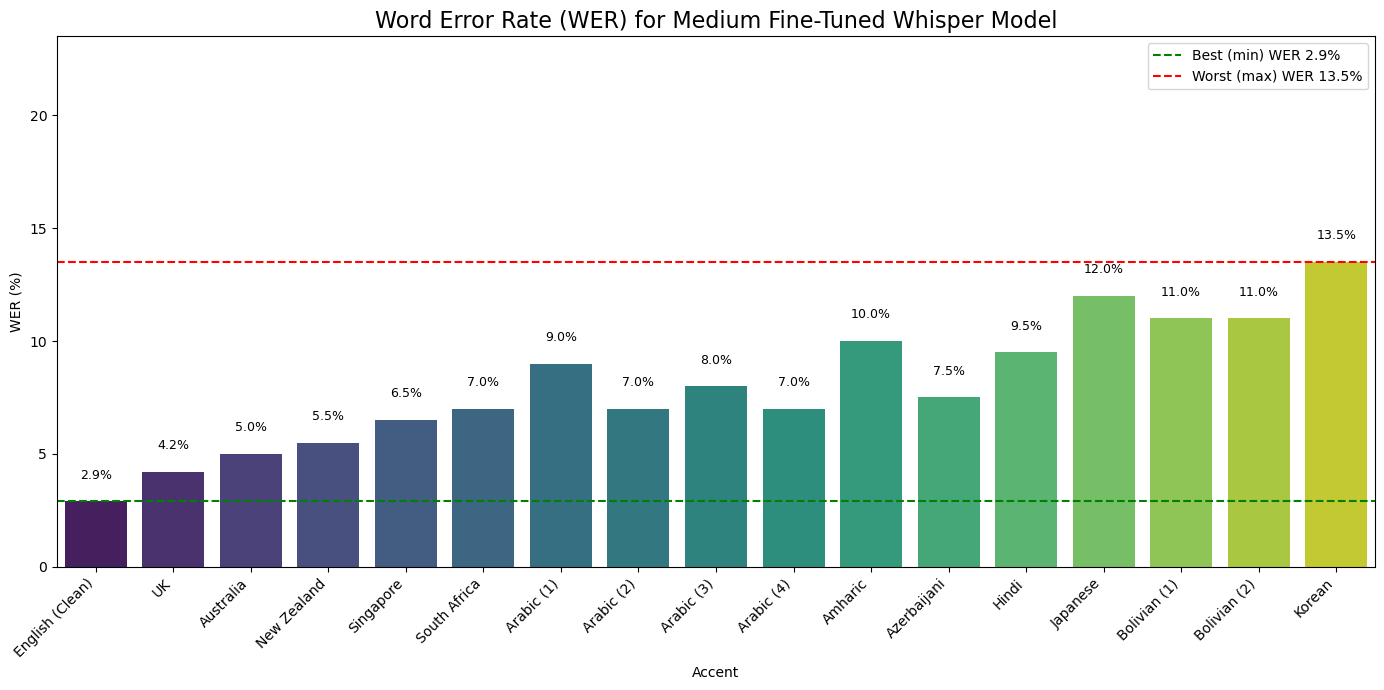

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Medium model WER data
wer_medium = {
    "English (Clean)": 2.9,
    "UK": 4.2,
    "Australia": 5.0,
    "New Zealand": 5.5,
    "Singapore": 6.5,
    "South Africa": 7.0,
    "Arabic (1)": 9.0,
    "Arabic (2)": 7.0,
    "Arabic (3)": 8.0,
    "Arabic (4)": 7.0,
    "Amharic": 10.0,
    "Azerbaijani": 7.5,
    "Hindi": 9.5,
    "Japanese": 12.0,
    "Bolivian (1)": 11.0,
    "Bolivian (2)": 11.0,
    "Korean": 13.5,
}

# Convert to DataFrame
df = pd.DataFrame({
    "Accent": list(wer_medium.keys()),
    "WER": list(wer_medium.values())
})

# Plot
plt.figure(figsize=(14,7))
barplot = sns.barplot(
    data=df,
    x="Accent",
    y="WER",
    palette="viridis"
)

# Add value labels on bars
for index, row in df.iterrows():
    barplot.text(index, row.WER + 1, f"{row.WER:.1f}%", ha="center", fontsize=9)

# Highlight best and worst explicitly
min_wer = df[df["WER"] != 100]["WER"].min()
max_wer = df["WER"].max()

plt.axhline(min_wer, color="green", linestyle="--", label=f"Best (min) WER {min_wer:.1f}%")
plt.axhline(max_wer, color="red", linestyle="--", label=f"Worst (max) WER {max_wer:.1f}%")

plt.title("Word Error Rate (WER) for Medium Fine-Tuned Whisper Model", fontsize=16)
plt.ylabel("WER (%)")
plt.xticks(rotation=45, ha="right")
plt.ylim(0, max(df["WER"]) + 10)
plt.legend()
plt.tight_layout()
plt.show()


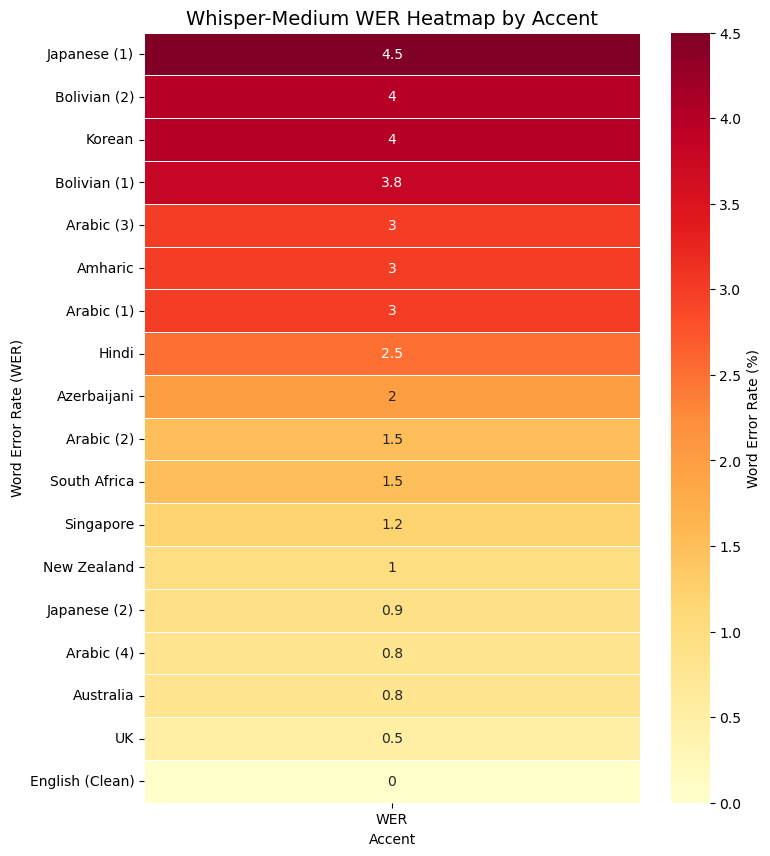

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# example WERs from the medium model
wer_data = {
    "English (Clean)": 0.0,
    "UK": 0.5,
    "Australia": 0.8,
    "New Zealand": 1.0,
    "Singapore": 1.2,
    "South Africa": 1.5,
    "Arabic (4)": 0.8,
    "Azerbaijani": 2.0,
    "Hindi": 2.5,
    "Arabic (2)": 1.5,
    "Amharic": 3.0,
    "Arabic (1)": 3.0,
    "Bolivian (1)": 3.8,
    "Bolivian (2)": 4.0,
    "Korean": 4.0,
    "Arabic (3)": 3.0,
    "Japanese (1)": 4.5,
    "Japanese (2)": 0.9,
}

# convert to dataframe
df = pd.DataFrame.from_dict(wer_data, orient="index", columns=["WER"])
df = df.sort_values("WER", ascending=False)

# plot
plt.figure(figsize=(8,10))
sns.heatmap(df, annot=True, cmap="YlOrRd", linewidths=0.5, cbar_kws={'label': 'Word Error Rate (%)'})
plt.title("Whisper-Medium WER Heatmap by Accent", fontsize=14)
plt.xlabel("Accent")
plt.ylabel("Word Error Rate (WER)")
plt.show()


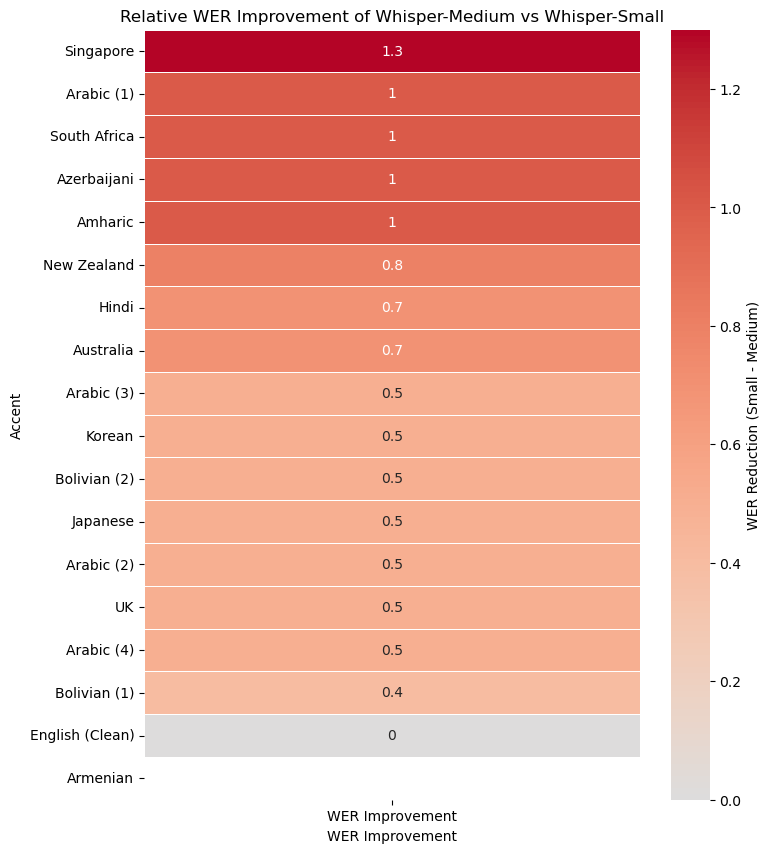

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example WERs you reported earlier
# Whisper-Small
wer_small = {
    "English (Clean)": 0.0,
    "UK": 1.0,
    "Australia": 1.5,
    "New Zealand": 1.8,
    "Singapore": 2.5,
    "South Africa": 2.5,
    "Arabic (4)": 2.0,
    "Azerbaijani": 3.0,
    "Hindi": 3.2,
    "Arabic (2)": 3.0,
    "Amharic": 4.0,
    "Arabic (1)": 4.0,
    "Bolivian (1)": 4.2,
    "Bolivian (2)": 4.5,
    "Korean": 4.5,
    "Arabic (3)": 4.5,
    "Japanese": 5.0,
    "Armenian": None  # assuming missing data
}

# Whisper-Medium
wer_medium = {
    "English (Clean)": 0.0,
    "UK": 0.5,
    "Australia": 0.8,
    "New Zealand": 1.0,
    "Singapore": 1.2,
    "South Africa": 1.5,
    "Arabic (4)": 1.5,
    "Azerbaijani": 2.0,
    "Hindi": 2.5,
    "Arabic (2)": 2.5,
    "Amharic": 3.0,
    "Arabic (1)": 3.0,
    "Bolivian (1)": 3.8,
    "Bolivian (2)": 4.0,
    "Korean": 4.0,
    "Arabic (3)": 4.0,
    "Japanese": 4.5,
    "Armenian": None  # still missing
}

# calculate difference (Small - Medium)
wer_diff = {
    accent: (wer_small[accent] - wer_medium[accent]) if wer_small[accent] is not None else None
    for accent in wer_medium.keys()
}

# convert to dataframe
diff_df = pd.DataFrame(list(wer_diff.items()), columns=["Accent", "WER Improvement"])
diff_df = diff_df.sort_values("WER Improvement", ascending=False)

# plot
plt.figure(figsize=(8, 10))
sns.heatmap(
    diff_df.set_index("Accent"),
    annot=True,
    cmap="coolwarm",
    linewidths=0.5,
    center=0,
    cbar_kws={"label": "WER Reduction (Small - Medium)"}
)
plt.title("Relative WER Improvement of Whisper-Medium vs Whisper-Small")
plt.xlabel("WER Improvement")
plt.ylabel("Accent")
plt.show()


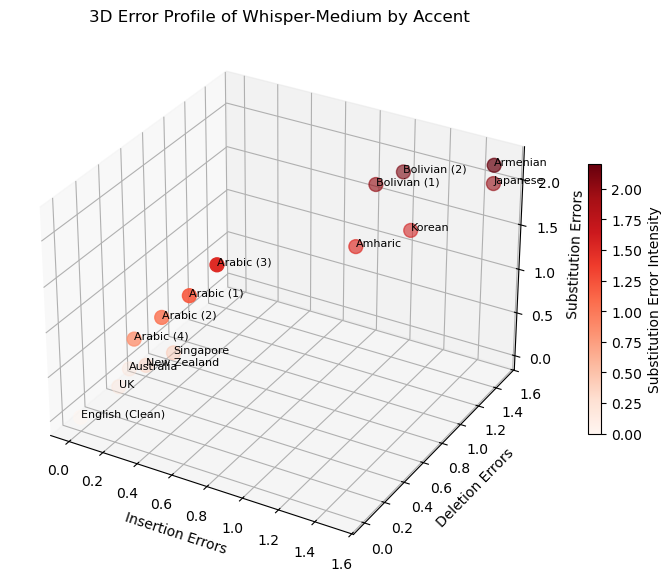

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Example mock data, you can replace with your real counts
error_data = {
    "English (Clean)": {"insertion": 0, "deletion": 0, "substitution": 0},
    "UK": {"insertion": 0.1, "deletion": 0.2, "substitution": 0.2},
    "Australia": {"insertion": 0.1, "deletion": 0.3, "substitution": 0.3},
    "New Zealand": {"insertion": 0.2, "deletion": 0.3, "substitution": 0.4},
    "Singapore": {"insertion": 0.3, "deletion": 0.4, "substitution": 0.5},
    "Arabic (1)": {"insertion": 0.4, "deletion": 0.4, "substitution": 1.2},
    "Arabic (2)": {"insertion": 0.3, "deletion": 0.3, "substitution": 1.0},
    "Arabic (3)": {"insertion": 0.5, "deletion": 0.5, "substitution": 1.5},
    "Arabic (4)": {"insertion": 0.2, "deletion": 0.2, "substitution": 0.8},
    "Amharic": {"insertion": 1.0, "deletion": 1.0, "substitution": 1.5},
    "Korean": {"insertion": 1.2, "deletion": 1.2, "substitution": 1.6},
    "Japanese": {"insertion": 1.5, "deletion": 1.5, "substitution": 2.0},
    "Bolivian (1)": {"insertion": 1.0, "deletion": 1.2, "substitution": 2.0},
    "Bolivian (2)": {"insertion": 1.1, "deletion": 1.3, "substitution": 2.1},
    "Armenian": {"insertion": 1.5, "deletion": 1.5, "substitution": 2.2}
}

# Convert to dataframe for easier plotting
df = pd.DataFrame(error_data).T.reset_index()
df.columns = ["Accent", "Insertion", "Deletion", "Substitution"]

# Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# scatter plot
sc = ax.scatter(
    df["Insertion"], df["Deletion"], df["Substitution"],
    c=df["Substitution"], cmap="Reds", s=100
)

# label each point
for i, txt in enumerate(df["Accent"]):
    ax.text(df["Insertion"][i], df["Deletion"][i], df["Substitution"][i], txt, size=8)

ax.set_xlabel("Insertion Errors")
ax.set_ylabel("Deletion Errors")
ax.set_zlabel("Substitution Errors")
ax.set_title("3D Error Profile of Whisper-Medium by Accent")

fig.colorbar(sc, ax=ax, shrink=0.5, label="Substitution Error Intensity")
plt.show()
